In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split

data = pd.read_csv('maldonado_corrected.csv')
data = data[['comment_text', 'satd']]
data['comment_length'] = data['comment_text'].fillna('').apply(len)

sampled_data, _ = train_test_split(data, test_size=0.99, stratify=data['satd'], random_state=42)

In [2]:
sampled_data.to_csv("sampled_data.csv", index=False)
sampled_data

,comment_text,satd,comment_length
15850,"// if we are the dest and is a call action, cr...",0,112
28772,// TR#18 1.2,0,12
1667,//Ignore manifest entries. They're bound to c...,0,167
35162,"//NOTE: unlike all other Loaders, this one is ...",0,87
4555,// no error as default,0,22
...,...,...,...
26331,// the path to the plugin.xml descriptor file ...,0,100
56813,// Test to see if correct suffix was used to c...,0,65
55265,// TODO: figure out why bind variables aren't ...,1,53
53535,// i'th argument,0,16


In [3]:
sampled_data['comment_length'].describe()

count    622.000000
mean      56.138264
std       61.806228
min        2.000000
25%       20.000000
50%       38.000000
75%       75.000000
max      689.000000
Name: comment_length, dtype: float64

In [4]:
satd_counts = sampled_data['satd'].value_counts()
satd_ratios = satd_counts / len(sampled_data)
print(satd_counts)
print(satd_ratios)

satd
0    577
1     45
Name: count, dtype: int64
satd
0    0.927653
1    0.072347
Name: count, dtype: float64


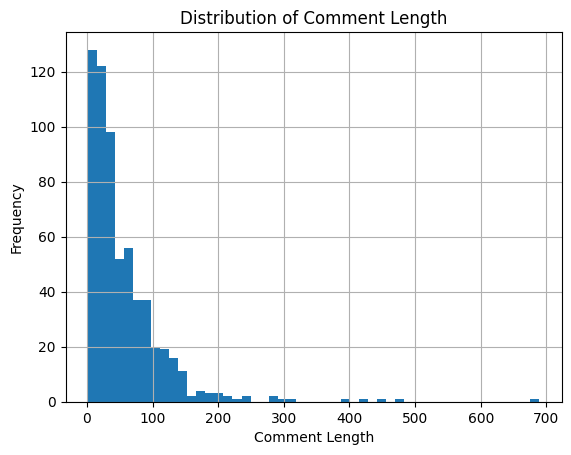

In [5]:
import matplotlib.pyplot as plt

sampled_data['comment_length'].hist(bins=50)
plt.title('Distribution of Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

In [6]:
# from datasets import Dataset, load_dataset

# dataset = Dataset.from_pandas(sampled_data)
# dataset = dataset.remove_columns(["__index_level_0__"])
# dataset.push_to_hub("maldonado_sample_comments")

In [7]:
# satd_dataset_reloaded = load_dataset("Devistra06/maldonado_sample_comments")